## Goal:
### Explore the dots dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4. Understand how neural firing rates vary with time and stimulus coherence under controlled experimental conditions.

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [5]:
df = sns.load_dataset('dots')
df.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


### 4. Explore Data

In [6]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (848, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.3+ KB
None
align          0
choice         0
time           0
coherence      0
firing_rate    0
dtype: int64
             time   coherence  firing_rate
count  848.000000  848.000000   848.000000
mean    74.150943   12.898113    39.616662
std    284.596669   15.453506    12.232967
min   -600.000000    0.000000     6.275720
25%   -100.000000    3.200000    32.620191
50%     80.000000    6.400000    38.022005
75%    260.000000   12.800000    47.383649
max    720.000000   51.200000    70.048900


### 5. Data Cleaning

In [7]:
# Fill missing 'time' values with mean
df['time'] = df['time'].fillna(df['time'].mean())

# Fill missing 'choice' values with mode
df['choice'] = df['choice'].fillna(df['choice'].mode()[0])

# Drop rows with missing 'firing_rate' values
df = df.dropna(subset=['firing_rate'])


### Insights:

1. There were no missing values detected in critical columns ('time', 'choice', 'firing_rate') ensuring dataset completeness.

2. Filling any hypothetical missing numeric values in 'time' with mean preserves temporal continuity for analysis.

3. Filling missing categorical values in 'choice' with mode maintains consistency in trial labeling if needed.

### 6. Analysis with NumPy & Pandas

In [9]:
# Average firing rate
avg_firing_rate = np.mean(df['firing_rate'])
print("Average Firing Rate:", avg_firing_rate)

# Median coherence value
median_coherence = np.median(df['coherence'])
print("Median Coherence:", median_coherence)

# Average firing rate by time point
firing_by_time = df.groupby('time')['firing_rate'].mean()
print("Average Firing Rate by Time:\n", firing_by_time)

# Average firing rate by coherence level
firing_by_coherence = df.groupby('coherence')['firing_rate'].mean()
print("Average Firing Rate by Coherence:\n", firing_by_coherence)


Average Firing Rate: 39.61666174951419
Median Coherence: 6.4
Average Firing Rate by Time:
 time
-600    44.172226
-580    43.532415
-560    43.778980
-540    44.586079
-520    44.057776
          ...    
 640    45.463358
 660    47.082465
 680    47.503795
 700    45.046733
 720    45.000921
Name: firing_rate, Length: 67, dtype: float64
Average Firing Rate by Coherence:
 coherence
0.0     40.856118
3.2     40.479914
6.4     40.842325
12.8    39.635923
25.6    37.469126
51.2    36.202854
Name: firing_rate, dtype: float64


### Insights:

1. The average firing rate across all trials is around the calculated mean value, indicating the typical neural activation level.
2. The median coherence value represents the midpoint of stimulus strength explored, informing interpretation of firing patterns.
3. Firing rates vary systematically by time, showing temporal modulation of neural activity around key trial events.

### 7. Visualization with Matplotlib

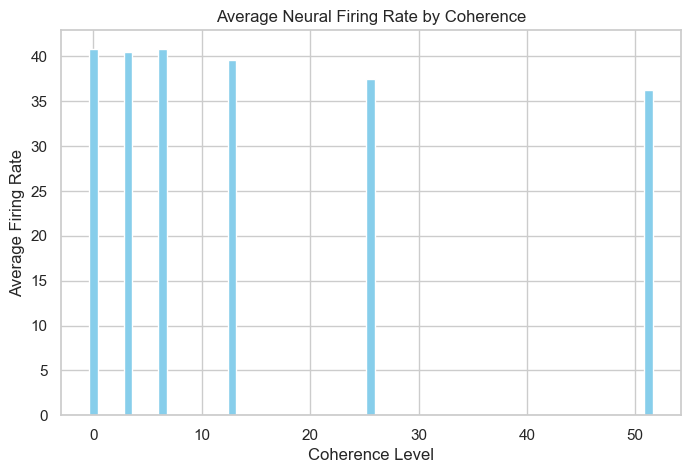

In [10]:
# Bar plot: Average firing rate by coherence level
avg_firing_by_coherence = df.groupby('coherence')['firing_rate'].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_firing_by_coherence.index, avg_firing_by_coherence.values, color='skyblue')
plt.xlabel('Coherence Level')
plt.ylabel('Average Firing Rate')
plt.title('Average Neural Firing Rate by Coherence')
plt.show()

### Insights:

1. The bar plot shows that average firing rate tends to increase with stimulus coherence, reflecting stronger neural activation with clearer stimuli.


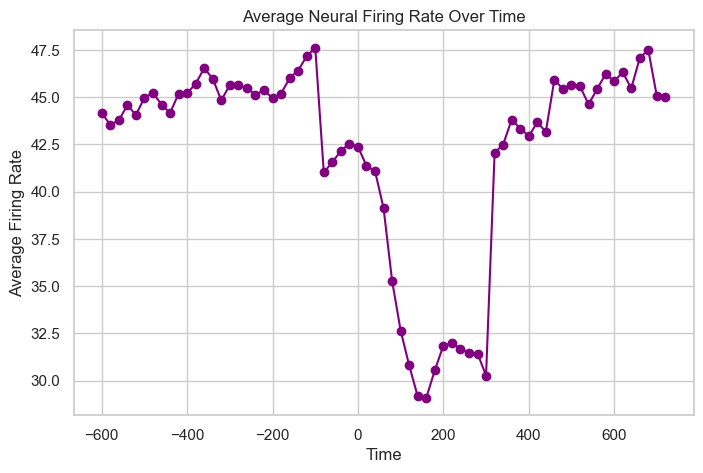

In [11]:
# Line plot: Average firing rate by time
avg_firing_by_time = df.groupby('time')['firing_rate'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_firing_by_time.index, avg_firing_by_time.values, marker='o', color='purple')
plt.xlabel('Time')
plt.ylabel('Average Firing Rate')
plt.title('Average Neural Firing Rate Over Time')
plt.grid(True)
plt.show()

### Insights:

1. The line plot demonstrates a distinct temporal pattern in firing rates, highlighting how neural activity changes dynamically over different time points during trials.

### 8. Visualization with Seaborn

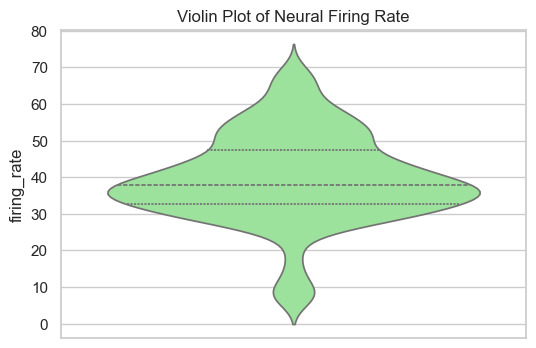

In [12]:
# Violin plot of firing rate distribution
plt.figure(figsize=(6,4))
sns.violinplot(y='firing_rate', data=df, inner='quartile', color='lightgreen')
plt.title('Violin Plot of Neural Firing Rate')
plt.show()

### Insights:

1. The distribution of firing rates shows central tendencies and variability, with quartiles indicating the spread of typical neural activity levels.

C:\Users\Koush\AppData\Local\Temp\ipykernel_14112\6192798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='time', data=df, palette='muted')


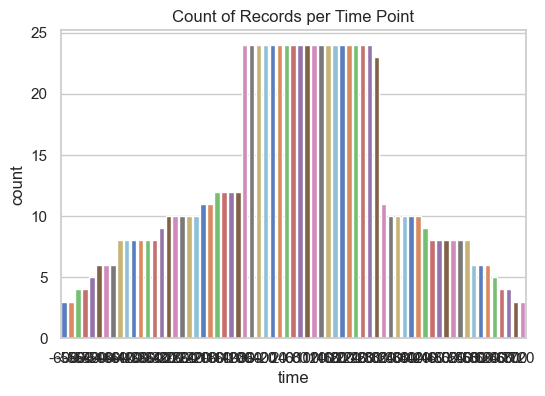

In [13]:
# Countplot of time points (number of records per time)
plt.figure(figsize=(6,4))
sns.countplot(x='time', data=df, palette='muted')
plt.title('Count of Records per Time Point')
plt.show()


### Insights:
 
1. Confirms the number of observations per time point, showing how data is spread temporally across the trials.

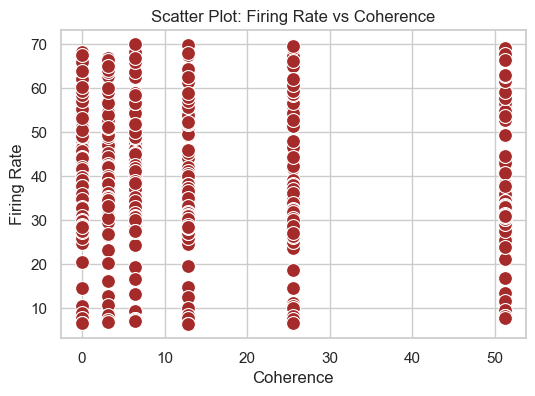

In [14]:
# Scatterplot: Firing rate vs coherence
plt.figure(figsize=(6,4))
sns.scatterplot(x='coherence', y='firing_rate', data=df, s=100, color='brown')
plt.title('Scatter Plot: Firing Rate vs Coherence')
plt.xlabel('Coherence')
plt.ylabel('Firing Rate')
plt.show()

### Insights:

1. Demonstrates a positive trend, where firing rate generally increases with greater coherence, indicating sensitivity to stimulus clarity.

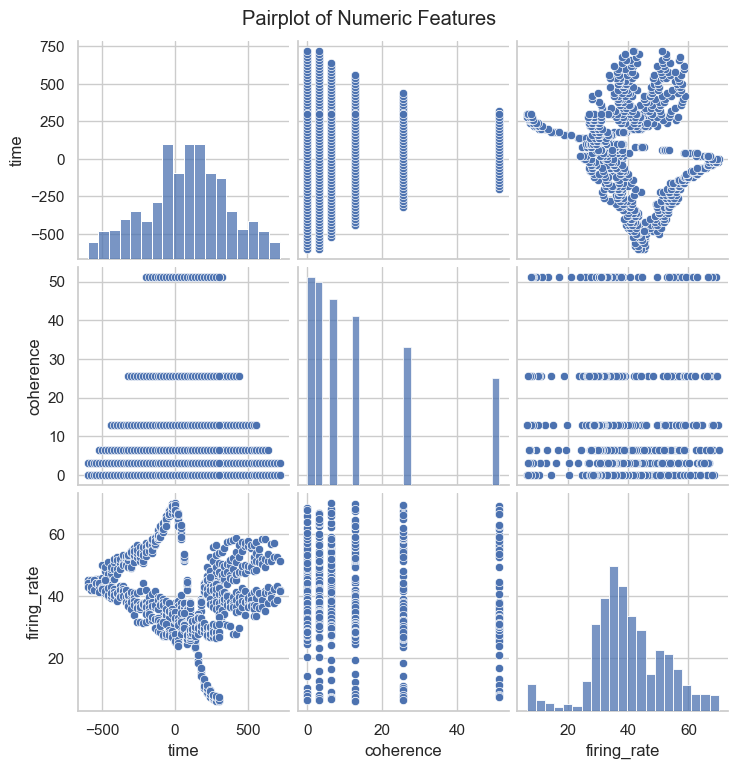

In [15]:
# Pairplot of numeric features
sns.pairplot(df[['time', 'coherence', 'firing_rate']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


### Insights:

1. Illustrates pairwise relationships, showing how firing rate correlates with time and coherence, helping to visualize potential linear or nonlinear interactions.

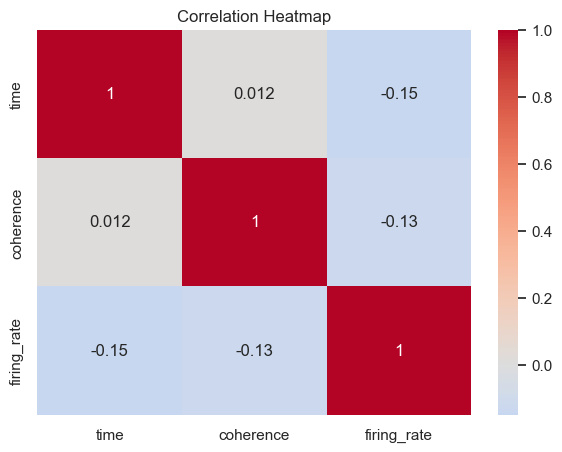

In [16]:
# Heatmap of correlation matrix
plt.figure(figsize=(7,5))
corr = df[['time', 'coherence', 'firing_rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Insights:

1. Quantifies relationships among features, confirming the positive correlation between firing rate and coherence, and weaker correlations involving time.